In [31]:
#Import libraries
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score



In [68]:
import pandas as pd
#Load Data Sets
df = pd.read_csv("C:\\Users\\.....\\...\\Projects\\Customer Segementation and Sentiment Analysis Using predictive modeling\\Womens Clothing E-Commerce Reviews.csv")
df = df[['Review Text', 'Rating']] 
df.dropna(inplace=True)  

In [70]:
#Creation of sentiment column
from textblob import TextBlob

# Define a function
def get_sentiment(text):
    polarity = TextBlob(str(text)).sentiment.polarity
    if polarity > 0:
        return 'positive'
    elif polarity < 0:
        return 'negative'
    else:
        return 'neutral'

# Apply it to the Review Text column
df['Sentiment'] = df['Review Text'].apply(get_sentiment)
print(df['Sentiment'].value_counts())


positive    21227
negative     1322
neutral        92
Name: Sentiment, dtype: int64


In [63]:
# Create a binary sentiment column (positive = 1 for rating >=4, negative = 0 for rating <=2)
df = df[df['Rating'] != 3]  
df['Sentiment'] = df['Rating'].apply(lambda x: 1 if x > 3 else 0)

In [57]:
#Text 
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['Review Text'])
y = df['Sentiment']




In [48]:
#Train Test Split
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['Review Text'])
y = df['Sentiment']



In [49]:
#Train/Test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [50]:
#Training
from sklearn.naive_bayes import MultinomialNB
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = MultinomialNB()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)


In [51]:
#Evaluation
from sklearn.metrics import classification_report, confusion_matrix
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Classification Report:\n", classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)



Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       474

    accuracy                           1.00       474
   macro avg       1.00      1.00      1.00       474
weighted avg       1.00      1.00      1.00       474



In [52]:
#Save the model
import joblib

# Save the trained model to a file
joblib.dump(model, 'clothing_sentiment_model.pkl')


['clothing_sentiment_model.pkl']

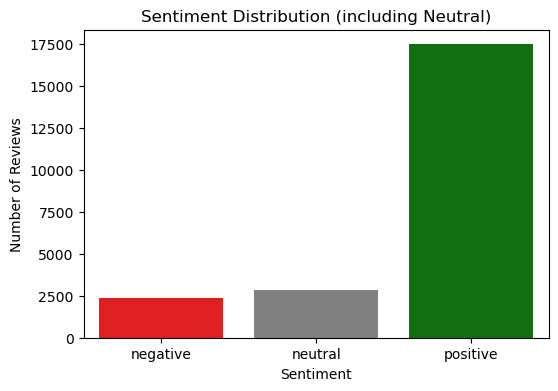

In [75]:
#Visualization
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Reload or revert df to include rating==3
df = pd.read_csv(
    "C:\\Users\\...\\...\\Projects\\Customer Segementation and Sentiment Analysis Using predictive modeling\\Womens Clothing E-Commerce Reviews.csv"
)
df = df[['Review Text','Rating']].dropna()

# 2. Create a 3‑way sentiment label
df['Sentiment'] = df['Rating'].apply(
    lambda x: 'positive' if x >= 4
    else ('negative' if x <= 2 else 'neutral')
)

# 3. Plot all three
plt.figure(figsize=(6,4))
order = ['negative','neutral','positive']
palette = ['red','gray','green']
sns.countplot(data=df, x='Sentiment', order=order, palette=palette)
plt.title("Sentiment Distribution (including Neutral)")
plt.xlabel("Sentiment")
plt.ylabel("Number of Reviews")
plt.show()



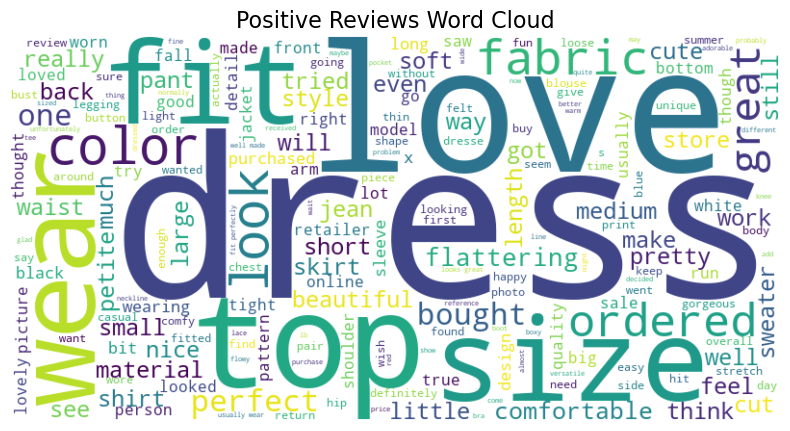

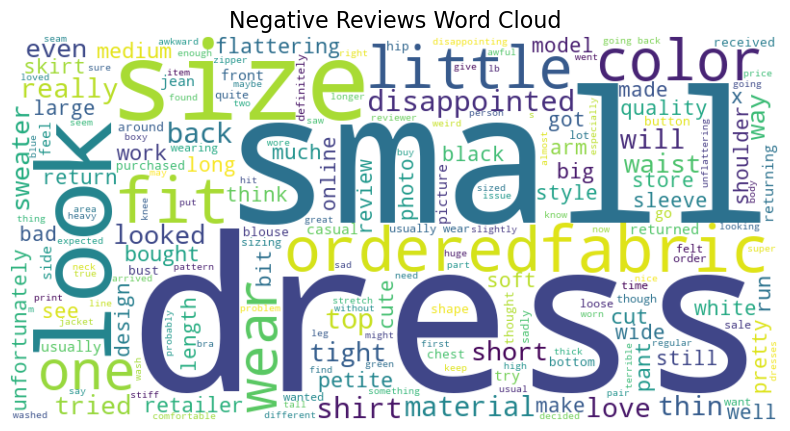

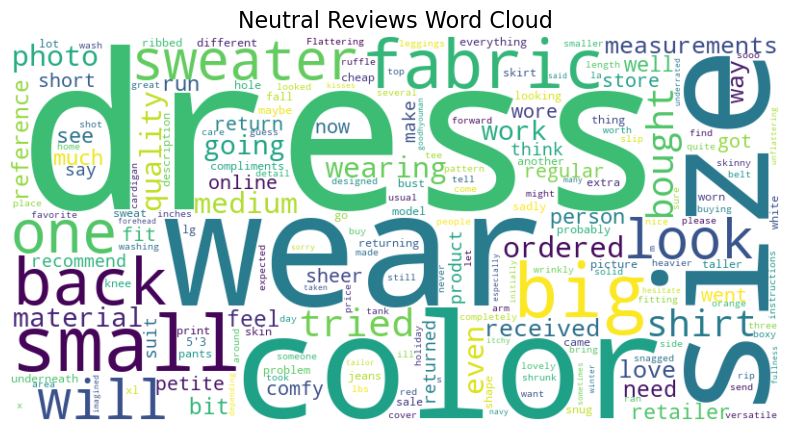

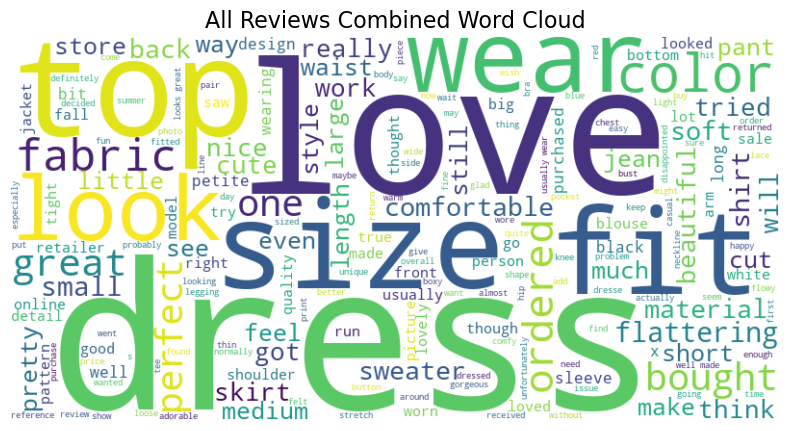

In [73]:
#Word Cloud Visualization
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Drop missing values in Review Text
df = df.dropna(subset=['Review Text'])

# Convert review text to string (in case of mixed types)
df['Review Text'] = df['Review Text'].astype(str)

# Separate by sentiment
positive_reviews = df[df['Sentiment'] == 'positive']['Review Text']
negative_reviews = df[df['Sentiment'] == 'negative']['Review Text']
neutral_reviews  = df[df['Sentiment'] == 'neutral']['Review Text']

# Join texts
positive_text = " ".join(positive_reviews)
negative_text = " ".join(negative_reviews)
neutral_text  = " ".join(neutral_reviews)
all_text      = " ".join(df['Review Text'])

# Define function to show wordcloud
def show_wordcloud(text, title):
    if text.strip():
        wc = WordCloud(width=800, height=400, background_color='white').generate(text)
        plt.figure(figsize=(10, 5))
        plt.imshow(wc, interpolation='bilinear')
        plt.axis('off')
        plt.title(title, fontsize=16)
        plt.show()
    else:
        print(f"No text available for: {title}")

# Generate word clouds
show_wordcloud(positive_text, "Positive Reviews Word Cloud")
show_wordcloud(negative_text, "Negative Reviews Word Cloud")
show_wordcloud(neutral_text,  "Neutral Reviews Word Cloud")
show_wordcloud(all_text,      "All Reviews Combined Word Cloud")



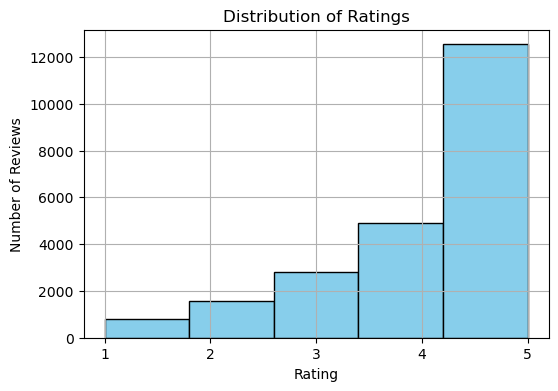

In [76]:
# Visualize the distribution of ratings
plt.figure(figsize=(6, 4))
df['Rating'].hist(bins=5, color='skyblue', edgecolor='black')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Number of Reviews')
plt.xticks([1, 2,3, 4, 5])  # Show only the rating scale
plt.show()
